<br><img src="Grenoble INP - Ense3.png" style="width:342px;height:131px"/>
<br>
 ---
 
 
<h1><center>Dynamic Models for Building Energy Management</center></h1>
<h3><center> Antonin ANDRÉ - Guillaume DAUENDORFFER - Emma HOAREAU - Kelian JAMBU</center></h3>

---


## 1) Model

### Plan of a simple building

Here is the building design we chose:

<img src="Indoorair1.jpg" style="width:351px;height:365px"/>
<i><center>Fig. 1 - Planview of the building</center></i>
<br>
We decided to model our building with two identical rooms separated by a common wall. The surface of the wall in each room 9 m²  and the volume contained in one room is 27 m3. 

We present below the full thermal model:
<img src="schema-complet4.png"/>
<i><center>Fig. 2 - Thermal Model</center></i>
<br>

### Hypothesis for boundary conditions, windows, doors, and wall composition.
<p style='text-align: justify;'> 
We chose walls consisting of an exterior layer of concrete and an interior layer of insulation. As for the door, we chose an oak wood door which allowed us to easily find the sizes characterizing it on the internet. We chose a surface door of 2 m².
The wall between the two houses is made of a layer of concrete surrounded by insulation so that each house is insulated in the same way. The windows are single glazed, they are only considered to be made of glass.
We consider an outside temperature To of 20°C and inside temperatures Ti_cvc1 = 16°C and Ti_cvc2 = 18°C for the two rooms.
The following table gathers the different constants we took to do our modelisation. 
</p>
<img src="Table1.png" style="width:772px;height:313px"/>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import dm4bem
import tuto

Sw = 9 #Surface of wall
Sd = 2 #Surface of door
V = 27 #Volume of a room
V_air = 5*V/3600 #Volume of ventilation

rhoC_cC = 2.5*10**6 #volumetric mass of concrete times specific heat of concrete
rhoI_cI = 2.0*10**6 #volumetric mass of insulant times specific heat of insulant
rhoG_cG = 2.0*10**6 #volumetric mass of glass times specific heat of glass
rho_air = 1.225 #volumetric mass of air
rho_wood = 500 #volumetric mass of wood

c_air = 1004 #specific heat of air
c_wood = 2000 #specific heat of wood


lmc = 2 #Thermal conductivity concrete
lmi = 0.04 #Thermal conductivity insulant
lmg = 1.2 #Thermal conductivity glass
lmd = 0.06 #Thermal conductivity door

Wc = 0.2 #width of concrete
Wi = 0.08 #width of insulant
Wg = 0.01 #width of glass
Wd = 0.1 #width of door

ho = 10 #convection coefficient with outdoor air
hi = 4 #convection coefficient with indoor air

Kp = 1000 #controller gain

To = 20 #temperature of outdoor air
Ti_cvc1 = 50 #temperature of HVAC in room 1
Ti_cvc2 = 15 #temperature of HVAC in room 2

### Adjancy matrix A, the conductance matrix G and the capacity matrix C.
<p style='text-align: justify;'> 
<br>The adjacency matrix A presents how the temperature nodes are connected by branches of heat flow. In our case, the matrix case is composed of 56 lines that correspond to the number of flow branches and 43 columns that correspond to the number of temperature nodes. For an element of the adjacency matrix (m,n), we fill the adjacency matrix by entering 1 if the flow enters into the node n and -1 if they are not connected to each other. We obtain the following matrix for our modelisation :</p>

In [2]:
A = np.zeros((56,43))

A[0][0] = 1

A[1][34] = 1
A[1][0] = -1

A[2][13] = 1
A[2][1] = -1

A[3][2] = 1

A[4][3] =1
A[4][2] = -1

A[5][4] = 1
A[5][3] = -1

A[6][4] = -1
A[6][35] = 1

A[7][5] = 1

A[8][6] = 1
A[8][5] = -1

A[9][7] = 1
A[9][6] = -1

A[10][36] = 1
A[10][7] = -1

A[11][8] = 1

A[12][37] = 1
A[12][8] = -1

A[13][9] = -1
A[13][13] = 1

A[14][10] = 1

A[15][11] = 1
A[15][10] = -1

A[16][11] = -1
A[16][31] = 1

A[17][12] = 1
A[17][31] = -1

A[18][13] = 1
A[18][12] = -1

A[19][13] = 1

A[20][13] = 1

A[21][13] = 1
A[21][14] = -1

A[22][14] = 1
A[22][15] = -1

A[23][15] = 1
A[23][16] = -1

A[24][16] = 1
A[24][17]=-1

A[25][17] = 1
A[25][38] = -1

A[26][18] = 1

A[27][18] = 1
A[27][33] = -1

A[28][39]=1
A[28][19]=-1

A[29][19]=1

A[30][40]=1
A[30][22]=-1

A[31][22]=1
A[31][21]=-1

A[32][21]=1
A[32][20]=-1

A[33][20]=1

A[34][41]=1
A[34][25]=-1

A[35][25]=1
A[35][24]=-1

A[36][24]=1
A[36][23]=-1

A[37][23]=1

A[38][18]=1
A[38][27]=-1

A[39][42]=1
A[39][26]=-1

A[40][26]=1

A[41][18]=1
A[41][30]=-1

A[42][30]=1
A[42][32]=-1

A[43][32]=1
A[43][29]=-1

A[44][29]=1
A[44][28]=-1

A[45][28]=1

A[46][18]=1

A[47][34]=-1
A[47][1]=1

A[48][35]=-1
A[48][13]=1

A[49][36]=-1
A[49][13]=1

A[50][37]=-1
A[50][9]=1

A[51][38]=-1
A[51][18]=1

A[52][39]=-1
A[52][33]=1

A[53][40]=-1
A[53][18]=1

A[54][41]=-1
A[54][18]=1

A[55][42]=-1
A[55][27]=1

print("Matrice A: \n", A)

Matrice A: 
 [[ 1.  0.  0. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]]


<p style='text-align: justify;'> 
The conductance matrix G is a diagonal matrix which contains the different  conductances of our modelisation. There are nq lines and nq columns with nq the number of flow branches. To fill our G matrix, we use the different conductance constants computed before. We obtain the following conductance matrix G for our model:</p>

In [12]:
Gc = lmc*Sw/Wc #Conductance of concrete
Gi = lmi*Sw/Wi #Conductance of insulant
Gcd = lmc*(Sw-Sd)/Wc #Conductance of concrete on the wall with door
Gid = lmi*(Sw-Sd)/Wi #Conductance of insulant on the wall with door
Gg = lmg*Sw/Wg #Conductance of glass
Gd = lmd*Sd/Wd #Conductance of door
G_airo = ho*Sw #Conductance of convection with outdoor air
G_airi = hi*Sw #Conductance of convection with indoor air
G_airi_withoutd = hi * (Sw-Sd) #Conductance of convection with indoor air on the wall with door
G_airo_withoutd = ho * (Sw-Sd) #Conductance of convection with outdor air on the wall with door
G_airid = hi*Sd #Conductance of convection with indoor air of the door
G_airod = ho*Sd #Conductance of convection with outdoor air of the door
G_vent = rho_air*V_air*c_air #Conductance of the ventilation
G_cvc = Kp #Conductance of the contro	ller of HVAC


G = [0 for i in range(56)]
G[0] = G_airo
G[1] = Gg/2
G[2] = G_airi
G[3] = G_airo
G[4] = Gc/2
G[5] = Gc/2+Gi/2
G[6] = Gi/2
G[7] = G_airo_withoutd
G[8] = Gcd/2
G[9] = Gcd/2 + Gid/2
G[10] = Gid/2 
G[11] = G_airod
G[12] = Gd/2
G[13] = G_airid
G[14] = G_airo
G[15] = Gc/2
G[16] = Gc/2 + Gi/2
G[17] = Gi/2
G[18] = G_airi
G[19] = G_vent
G[20] = G_cvc
G[21] = G_airi
G[22] = Gi/2
G[23] = Gi/2 + Gc/2
G[24] = Gc/2 + Gi/2
G[25] = Gi/2
G[26] = G_cvc
G[27] = G_airi
G[28] = Gg/2
G[29] = G_airo
G[30] = Gi/2
G[31] = Gi/2 + Gc/2
G[32] = Gc/2
G[33] = G_airo
G[34] = Gid/2
G[35] = Gid/2 + Gcd/2
G[36] = Gcd/2
G[37] = G_airo_withoutd

G[38] = G_airid
G[39] = Gd/2
G[40] = G_airod
G[41] = G_airi 
G[42] = Gi/2
G[43] = Gc/2 + Gi/2
G[44] = Gc/2
G[45] = G_airo
G[46] = G_vent
G[47] = Gg/2
G[48] = G_airi
G[49] = G_airi_withoutd
G[50] = Gd/2
G[51] = G_airi
G[52] = Gg/2
G[53] = G_airi
G[54] = G_airi_withoutd 
G[55] = Gd/2

G = np.diag(G)

print("Matrice G: \n", G)

Matrice G: 
 [[ 90.    0.    0.  ...   0.    0.    0. ]
 [  0.  540.    0.  ...   0.    0.    0. ]
 [  0.    0.   36.  ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ...  36.    0.    0. ]
 [  0.    0.    0.  ...   0.   28.    0. ]
 [  0.    0.    0.  ...   0.    0.    0.6]]


<p style='text-align: justify;'> 
Finally, the capacity matrix C is a diagonal matrix which represents the different capacities contained in our model. The number of columns correspond to the number of temperature nodes
</p>

In [13]:
Cc = rhoC_cC*Wc*Sw #Thermal capacity of concrete
Ci = rhoI_cI*Wi*Sw #Thermal capacity of insulant
Cg = rhoG_cG*Wg*Sw #Thermal capacity of glass
C_air = rho_air*c_air*V #Thermal capacity of air
Cd = rho_wood*c_wood*Wd*Sd #Thermal capacity of door

C = [0 for i in range(43)]
C[34] = Cg
C[3] = Cc
C[4] = Ci
C[6] = Cc
C[7] = Ci
C[37] = Cd
C[11] = Cc
C[31] = Ci
C[15] = Ci
C[16] = Cc
C[17] = Ci
C[39] = Cg
C[13] = C_air
C[22] = Ci
C[21] = Cc
C[25] = Ci
C[42] = Cd
C[24] = Cc
C[32] = Ci
C[29] = Cc
C[18] = C_air

C = np.diag(C)

print("Matrice C: \n", C)

Matrice C: 
 [[     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0. 200000.]]


## 2) Pyhton implementation: steady-state

### Implementation of matrices A, G, and C.

cf first part 

### Solar flows.

In [14]:
alpha_concrete = 0.6 #Absorption ratio of concrete
alpha_wood = 0.4 #Absorption ratio of wood
alpha_glass = 0.01 #Absorption ratio of glass
alpha_iso = 0.5 #Absorption ratio of insulant
tau_glass = 0.9 #Transmission ratio of glass
Q_day = 30 #Daily solar radiation
phi_o = alpha_concrete*Sw*Q_day #Solar flow on the outside walls
phi_i = alpha_iso*tau_glass*Q_day*Sw #Solar flow on the inside walls through the glass
Q_aux = 100 #Auxiliaries sources

### Input vectors b and f in time

In [6]:
f=np.zeros(43)
f[0]=phi_o
f[1]=phi_i
f[2]=phi_o
f[35]=phi_i
f[5]=phi_o
f[36]=phi_i
f[8]=phi_o
f[9]=phi_i
f[10]=phi_o
f[12]=phi_i
f[38]=phi_i
f[14]=phi_i
f[19]=phi_o
f[33]=phi_i
f[20]=phi_o
f[40]=phi_i
f[23]=phi_o
f[41]=phi_i
f[26]=phi_o
f[27]=phi_i
f[28]=phi_o
f[30]=phi_i
f[13]=Q_aux
f[18]=Q_aux

b=np.zeros(56)
b[0]=To
b[3]=To
b[7]=To
b[11]=To
b[14]=To
b[19]=To
b[20]=Ti_cvc1
b[26]=Ti_cvc2
b[29]=To
b[33]=To
b[37]=To
b[40]=To
b[45]=To
b[46]=To

print("Vector f:\n", f)
print("\nVector b:\n", b)

Vector f:
 [162.  121.5 162.    0.    0.  162.    0.    0.  162.  121.5 162.    0.
 121.5 100.  121.5   0.    0.    0.  100.  162.  162.    0.    0.  162.
   0.    0.  162.  121.5 162.    0.  121.5   0.    0.  121.5   0.  121.5
 121.5   0.  121.5   0.  121.5 121.5   0. ]

Vector b:
 [20.  0.  0. 20.  0.  0.  0. 20.  0.  0.  0. 20.  0.  0. 20.  0.  0.  0.
  0. 20. 50.  0.  0.  0.  0.  0. 15.  0.  0. 20.  0.  0.  0. 20.  0.  0.
  0. 20.  0.  0. 20.  0.  0.  0.  0. 20. 20.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [7]:
y=np.ones(43)
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])


## Steady-State response

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)


print(np.array_str(yss, precision=3, suppress_small=True))
print("\n")
print(np.array_str(ytc, precision=3, suppress_small=True))
print('\nTemperature of left room is ',ytc[13])
print('\nTemperature of right room is ',ytc[18])
print(f'\nMax error in steady-state between thermal circuit and state-space:\
{max(abs(yss - ytc)):.2e}')

[29.671 32.295 22.437 23.71  24.922 22.96  24.252 25.483 28.609 62.515
 22.437 23.71  50.382 48.599 51.059 36.425 35.728 35.031 16.107 21.195
 21.751 21.653 21.56  22.275 22.196 22.121 28.146 31.18  21.751 21.653
 19.604 24.922 21.56  20.994 30.983 50.382 51.323 45.562 20.396 21.094
 19.604 20.544 29.663]


[29.671 32.295 22.437 23.71  24.922 22.96  24.252 25.483 28.609 62.515
 22.437 23.71  50.382 48.599 51.059 36.425 35.728 35.031 16.107 21.195
 21.751 21.653 21.56  22.275 22.196 22.121 28.146 31.18  21.751 21.653
 19.604 24.922 21.56  20.994 30.983 50.382 51.323 45.562 20.396 21.094
 19.604 20.544 29.663]

Temperature of left room is  48.59867603353899

Temperature of right room is  16.10658122853387

Max error in steady-state between thermal circuit and state-space:1.20e-12


# 3) Pyhton implementation: simulation

### Simulate a step response

We want to simulate the variation of temperature in our system in response to a step command.


Maximum time step: 61.01 s


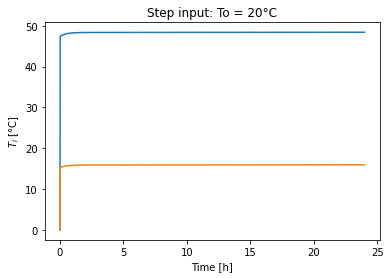

In [8]:
##Dynamic response
dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'Maximum time step: {dtmax:.2f} s')

dt = dtmax/2
duration = 3600*24*1

n = int(np.floor(duration/dt))

t=np.arange(0,n*dt,dt)

u=np.ones((len(np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])),n))

for i in range(n):
	u[:,i]=np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])




n_tC = As.shape[0]

temp_exp = np.zeros([n_tC,t.shape[0]])
temp_imp = np.zeros([n_tC,t.shape[0]])

I = np.eye(n_tC)

for k in range(n - 1):
	temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k] + dt * Bs @ u[:, k]
	temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
    	(temp_imp[:, k] + dt * Bs @ u[:, k])
   	 
y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u
fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp[13,:], t / 3600, y_exp[18,:])
ax.set(xlabel='Time [h]',
       ylabel='$T_i$ [°C]',
       title='Step input: To = 20°C')
plt.show()


<p style='text-align: justify;'> 
We have succeeded in modeling the response to a temperature step. We see a fast response of the system to arrive in the two rooms at the required temperature. We notice that when the temperatures are equal, the two parts behave in the same way which is normal because the system is symmetrical with respect to the two parts.
In orange we have the curve of the left room and in blue the right room. We can also see that when the controller’s gain is high, the temperatures reach the respective HVAC temperatures and when the gain is low, the temperatures stabilize at the same value which is intermediate between the HVAC temperatures and the outside temperature.
</p>


### Simulate the response to weather data.
<p style='text-align: justify;'> 
Now, we want to take into account the weather data to better simulate our system. The weather data will provide both the evolution of the outside temperature and the solar flow through time.
</p>

In [9]:
import sol_rad_tilt_surf
##Weather data

filename = 'FRA_Nancy.071800_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-02-05 18:00:00'

# Read weather data from Energyplus .epw file
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather[(weather.index >= start_date) & (weather.index < end_date)]


surface_orientation_est = {'slope': 90,
                   	'azimuth': 0,
                   	'latitude': 0}

surface_orientation_nord = {'slope': 90,
                   	'azimuth': 0,
                   	'latitude': 90}

surface_orientation_ouest = {'slope': 90,
                   	'azimuth': 0,
                   	'latitude': 180}

surface_orientation_sud = {'slope': 90,
                   	'azimuth': 0,
                   	'latitude': -90}

surface_orientation_roof = {'slope': 0,
                   	'azimuth': 0,
                   	'latitude': 0}

albedo = 0.2

rad_surf_e = dm4bem.sol_rad_tilt_surf(weather, surface_orientation_est, albedo)
rad_surf_e['Φte'] = rad_surf_e.sum(axis=1)

rad_surf_n = dm4bem.sol_rad_tilt_surf(weather, surface_orientation_nord, albedo)
rad_surf_n['Φtn'] = rad_surf_n.sum(axis=1)

rad_surf_s = dm4bem.sol_rad_tilt_surf(weather, surface_orientation_sud, albedo)
rad_surf_s['Φts'] = rad_surf_s.sum(axis=1)

rad_surf_o = dm4bem.sol_rad_tilt_surf(weather, surface_orientation_ouest, albedo)
rad_surf_o['Φto'] = rad_surf_o.sum(axis=1)

rad_surf_r = dm4bem.sol_rad_tilt_surf(weather, surface_orientation_roof, albedo)
rad_surf_r['Φtroof'] = rad_surf_e.sum(axis=1)

data = pd.concat([weather['temp_air'], rad_surf_e['Φte'], rad_surf_n['Φtn'], rad_surf_s['Φts'], rad_surf_o['Φto'], rad_surf_r['Φtroof']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})

data['Ti'] = 20 * np.ones(data.shape[0])
data['Qa'] = 0 * np.ones(data.shape[0])

t = dt * np.arange(data.shape[0])

u = pd.concat([data['To'], data['To'], data['To'], data['To'], data['To'], data['To'], data['Ti'], data['Ti'],data['To'], data['To'], data['To'], data['To'], data['To'], data['To'],
           	alpha_glass * Sw * data['Φte'], alpha_concrete * Sw * data['Φtn'], alpha_concrete * (Sw-Sd) * data['Φto'], alpha_wood * Sd * data['Φto'], alpha_iso * tau_glass * Sd * data['Φte'], alpha_concrete * Sw * data['Φtroof'], data['Qa'], alpha_iso * tau_glass * Sw * data['Φts'], data['Qa'], alpha_glass * Sw * data['Φte'], alpha_concrete * Sw * data['Φts'], alpha_concrete * (Sw-Sd) * data['Φto'], alpha_wood * Sd * data['Φto'], alpha_wood * Sd * tau_glass * data['Φte'], alpha_concrete * Sw * data['Φtroof'], alpha_iso * tau_glass * Sw * data['Φte'], alpha_iso * tau_glass * (Sw-Sd) * data['Φte'], alpha_iso * tau_glass * Sw * data['Φte'], alpha_iso * tau_glass * Sw * data['Φte'], alpha_iso * (Sw-Sd) * data['Φte']]  	 
           	, axis=1)

temp_exp = 20 * np.ones([As.shape[0], u.shape[0]])

for k in range(u.shape[0] - 1):
	temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k]\
    	+ dt * Bs @ u.iloc[k, :]
   	 
y_exp = Cs @ temp_exp + Ds @ u.to_numpy().T
q_HVAC = Kp * (data['Ti'] - y_exp[0, :])

fig, axs = plt.subplots(2, 1)
# plot indoor and outdoor temperature
axs[0].plot(t / 3600, y_exp[0, :], label='$T_{indoor}$')
axs[0].plot(t / 3600, data['To'], label='$T_{outdoor}$')
axs[0].set(xlabel='Time [h]',
       	ylabel='Temperatures [°C]',
       	title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600,  q_HVAC, label='$q_{HVAC}$')
axs[1].plot(t / 3600, data['Φt1'], label='$Φ_{total}$')
axs[1].set(xlabel='Time [h]',
       	ylabel='Heat flows [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()


IndentationError: expected an indented block (sol_rad_tilt_surf.py, line 32)

<p style='text-align: justify;'> 
In this code, we took into account every surface orientation to determine the exact radiation for each surface, for both the outside and inside walls. Unfortunately, the sol_rad_tilt_surf function is missing so we could not simulate it to try our solution.
</p>